# DSO105 Intermediate Statistics L4 Hands On Part 1 - R

In [1]:
## packages

library(tidyverse)
library(rcompanion)
library(car)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [4]:
## data
data = read.csv('../../datasets/avocados.csv')

In [5]:
head(data)

,X,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,type,year,region
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,conventional,2015,Albany
5,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
6,5,11/22/2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0,conventional,2015,Albany


## Question: Does the average price of avocados differ between Albany, Houston, and Seattle?

### Data wrangling

In [7]:
sales = na.omit(data %>% filter(region %in% c("Albany", "Houston", "Seattle")))

In [8]:
sales$AveragePrice = as.numeric(sales$AveragePrice)

### Assumptions
#### Normality

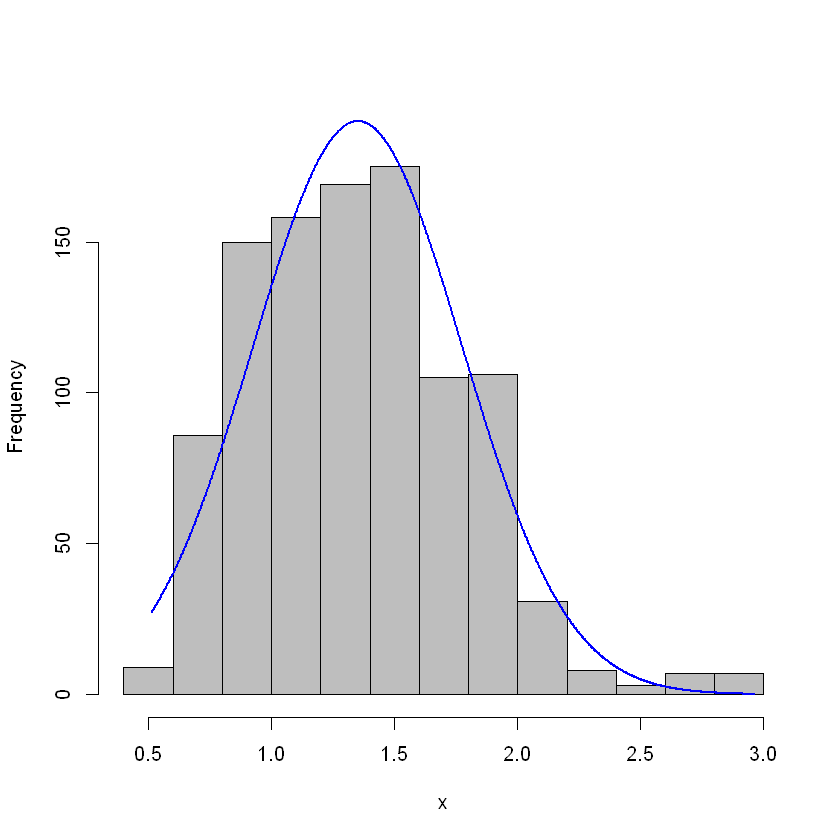

In [10]:
 plotNormalHistogram(sales$AveragePrice)
## a little positively skewed

In [12]:
sales$AveragePriceSQRT = sqrt(sales$AveragePrice)
## take the square root to attempt to adjust

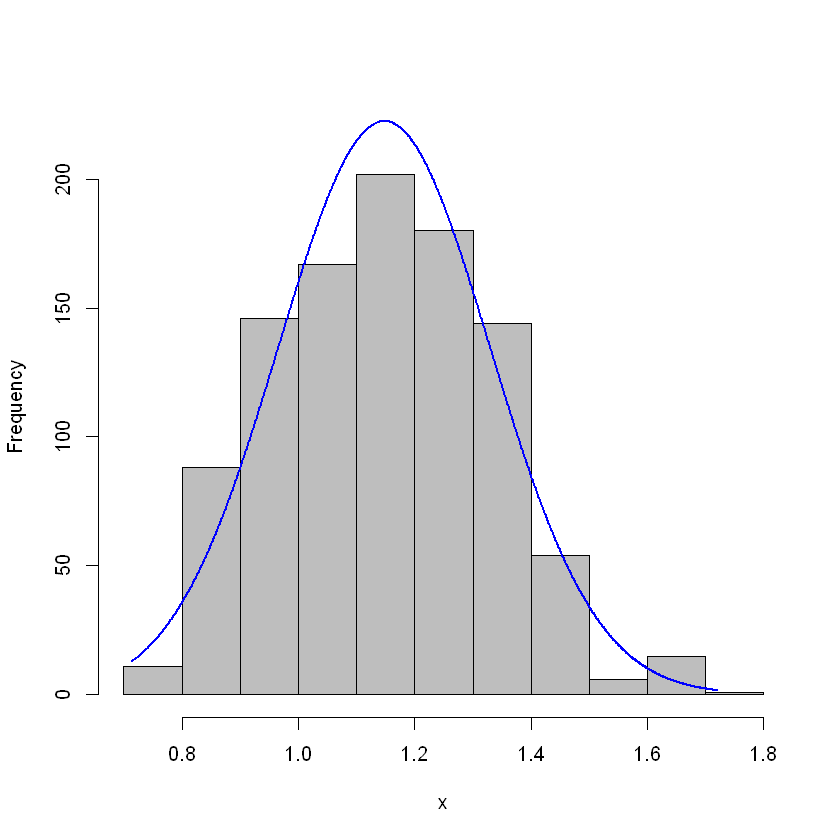

In [13]:
plotNormalHistogram(sales$AveragePriceSQRT)
## looks more approx. normal - still try log

In [14]:
sales$AveragePriceLOG = log(sales$AveragePrice)
## take the log to attempt to adjust

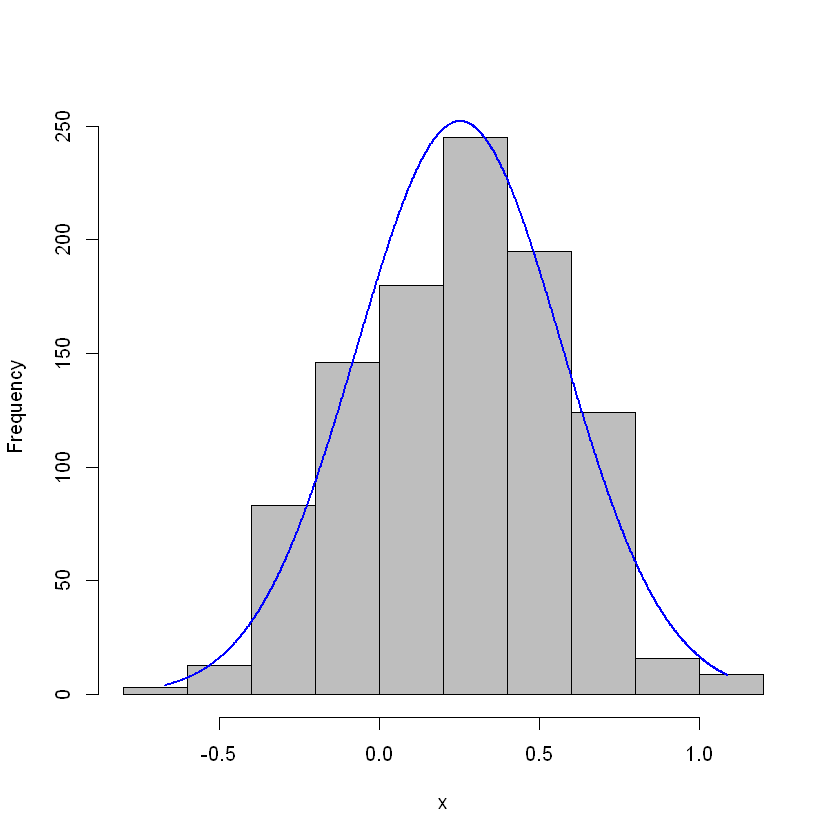

In [16]:
plotNormalHistogram(sales$AveragePriceLOG)
## maybe a little better - but the sqrt is much less dramatic a transformation, so let's go with AveragePriceSQRT

#### Homogeneity of Variance

In [17]:
bartlett.test(AveragePriceSQRT ~ region, data= sales)


	Bartlett test of homogeneity of variances

data:  AveragePriceSQRT by region
Bartlett's K-squared = 70.75, df = 2, p-value = 4.333e-16


#### ANOVA

In [19]:
ANOVA = lm(AveragePriceSQRT ~ region, data= sales)

In [20]:
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
region,2,258.8475,1.688602e-91
Residuals,1011,NA,NA


### Interpret Results

In [21]:
pairwise.t.test(sales$AveragePriceSQRT, sales$region, p.adjust = "bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  sales$AveragePriceSQRT and sales$region 

        Albany  Houston
Houston < 2e-16 -      
Seattle 8.1e-06 < 2e-16

P value adjustment method: bonferroni 

In [22]:
salesMeans = sales %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))

In [23]:
salesMeans

region,Mean
<chr>,<dbl>
Albany,1.561036
Houston,1.047929
Seattle,1.442574


## The average price varies amongst all three regions. Albany has an average price of $1.56, Seattle with $1.44, and Houston at $1.05.